In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import datetime

In [2]:
def format(atn):
    atn = atn[30:].drop(columns= ['Actical List Export File  (Version 03.00)','Unnamed: 1', 'Unnamed: 7'])
    atn = atn.rename(columns= {'Unnamed: 2': 'Elapsed seconds', 'Unnamed: 3': 'Date', 'Unnamed: 4': 'Time', 'Unnamed: 5': 'Activity Counts', 'Unnamed: 6': 'Steps', 'Unnamed: 8': 'Activity Intensity', 'Unnamed: 9': 'Button Press'})
    atn['Date time'] = pd.to_datetime(atn['Date'] +' '+ atn['Time'])
    atn['Sleep score'] = 0.04*atn['Activity Counts'].rolling(window = 5, center = True).sum().fillna(0) + 0.16*atn['Activity Counts'].rolling(window = 3, center = True).sum().fillna(0) + atn['Activity Counts']*0.8
    atn['Sleep likely'] = atn['Sleep score'] <=40
    atn['Choi'] = atn['Activity Counts'].astype(bool).astype(int)
    atn['New1'] = atn["Choi"].rolling(window = 61, center = True).sum() <=2
    atn['New2'] = atn['Choi'].rolling(window = 91, center = True).sum() <=6
    atn['Choi'] = atn['New1'].astype(int) + atn['New2'].astype(int) ==2
    return atn

In [5]:
parselist = []

In [91]:
def readfile(i):
    pompom = pd.read_excel(r"xxx",parselist[i], dtype=str)
    pompom['dt1'] = pd.to_datetime(pompom['Unnamed: 1'] + ' ' + pompom['sleep'])
    pompom['dt2'] = pd.to_datetime(pompom['Unnamed: 3'] + ' ' + pompom['Wake'])
    return pompom

In [ ]:
def bare(atn):
    atn["Activity Counts"] = atn["Activity Counts"].astype(int)
    atn['Sleep score'] = 0.04*atn['Activity Counts'].rolling(window = 5, center = True).sum().fillna(0) + 0.16*atn['Activity Counts'].rolling(window = 3, center = True).sum().fillna(0) + 0.8*atn['Activity Counts'].fillna(0)
    atn['Sleep likely'] = atn['Sleep score'] <=40
    atn['Date time'] = pd.to_datetime(atn['Date']+ ' '+ atn['Time'])
    atn['Choi'] = atn['Activity Counts'].astype(bool).astype(int)
    atn['New1'] = atn["Choi"].rolling(window = 61, center = True).sum() <=2
    atn['New2'] = atn['Choi'].rolling(window = 91, center = True).sum() <=6
    atn['Choi'] = atn['New1'].astype(int) + atn['New2'].astype(int) ==2
    return atn

In [70]:
def analyze(parser, acti):
    y = readfile(parser)
    acti = format(acti)
    i = 0
    df1 = pd.DataFrame()
    while i <len(y):
        flag = acti.loc[(acti["Date time"]>= y.dt1[i]) & (acti["Date time"]<= y.dt2[i])]
        sleepL = y.dt2[i] - y.dt1[i]
        sleepL = sleepL.total_seconds()/60
        waso1 = sum(flag["Activity Counts"]>=25)
        flagged = 1
        flag = flag.reset_index()
        editor =0
        while flagged < len(flag):
            if flag['Activity Counts'].loc[flagged] >=25 and flag['Activity Counts'].loc[flagged-1] <25:
                editor +=1
            flagged+=1
        waso = waso1 - editor
        sleeq = (sleepL-waso)/sleepL
        df2 = pd.DataFrame([y.dt1[i], y.dt2[i],waso,sleeq,editor,sleepL]).T
        df2.columns = ["Sleep time", "Wake time", "WASO", "SE", "Awakenings","TST"]
        df1 = pd.concat([df1, df2])
        i=i+1
    return df1.median()

In [120]:
def analyze1(parser, acti):
    y = readfile(parser)
    acti = bare(acti)
    i = 0
    df1 = pd.DataFrame()
    while i <len(y):
        flag = acti.loc[(acti["Date time"]>= y.dt1[i]) & (acti["Date time"]<= y.dt2[i])]
        sleepL = y.dt2[i] - y.dt1[i]
        sleepL = sleepL.total_seconds()/60
        waso1 = sum(flag["Activity Counts"]>=25)*2
        flagged = 1
        flag = flag.reset_index()
        editor =0
        while flagged < len(flag):
            if flag['Activity Counts'].loc[flagged] >=25 and flag['Activity Counts'].loc[flagged-1] <25:
                editor +=1
            flagged+=1
        waso = waso1 - editor
        sleeq = (sleepL-waso)/sleepL
        df2 = pd.DataFrame([y.dt1[i], y.dt2[i],waso,sleeq,editor,sleepL]).T
        df2.columns = ["Sleep time", "Wake time", "WASO", "SE", "Awakenings","TST"]
        df1 = pd.concat([df1, df2])
        i=i+1
    return df1.median()

In [ ]:
readfile(13)

In [30]:
acti_a = format(pd.read_excel(r"xxx"))

In [86]:
acti_a = format(pd.read_excel(r"xxx"))

In [144]:
analyze(28, pd.read_excel(r"xxx"))

C:\Users\anhth\AppData\Local\Temp\ipykernel_18116\4110255009.py:24: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return df1.median()


WASO           82.000000
SE              0.805383
Awakenings     28.000000
TST           427.000000
dtype: float64

In [143]:
analyze1(29, pd.read_excel(r"xxx", dtype = str))

C:\Users\anhth\AppData\Local\Temp\ipykernel_18116\3109563739.py:24: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return df1.median()


WASO           62.000000
SE              0.874773
Awakenings     34.000000
TST           501.000000
dtype: float64

In [74]:
acti_a = pd.read_excel(r"xxx", dtype=str)

In [3]:
def activity(sub, x1, x2, x3, y1,y2,y3, lim):
    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    x = sub['Date time']
    ax.set_xlim([datetime.date(x1,x2,x3), datetime.date(y1,y2,y3)])
    y = sub['Activity Counts']
    ax.set_ylim(0,lim) 
    ax.plot(x,y)

In [4]:
acti_a = format(pd.read_excel(r"xxx"))

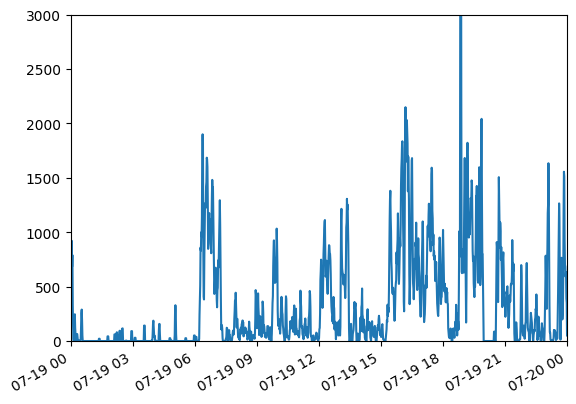

In [7]:
activity(acti_a,2021,7,19,2021,7,20,3000)

In [14]:
"""
ma5series = atn['Activity Counts'].rolling(window= 11).mean().shift(-5).fillna(0) 
natseries = (atn['Activity Counts']>=50) & (atn['Activity Counts']<=100)
sd6series = atn['Activity Counts'].rolling(window= 6).std()
lnseries = (np.log(atn['Activity Counts'].astype(float)+1))
atn['Sleep score'] = 7.601- (0.065* ma5series) - (1.08*natseries) - (0.056*sd6series) - (0.073 *lnseries)
atn['Sleep likely'] = atn['Sleep score'] <=0


atn['Choi'].rolling(windows = 61).shift(-30).sum() <=2 and atn['Choi'].rolling(windows = 91).shift(-45).sum <=6
```
    atn['New1'] = atn["Sleep likely"].rolling(window=180).sum() >=155
    atn['New2'] = atn['Sleep likely'].rolling(window=60).sum().shift(-60) <= 10
    atn['Wake Time'] = atn['New1'].astype(int) + atn['New2'].astype(int) ==2
    atn['New1'] = atn["Sleep likely"].rolling(window=180).sum().shift(-180) >=155
    atn['New2'] = atn['Sleep likely'].rolling(window=60).sum() <= 10
    atn['Sleep Time'] = atn['New1'].astype(int) + atn['New2'].astype(int) ==2
"""

'\nma5series = atn[\'Activity Counts\'].rolling(window= 11).mean().shift(-5).fillna(0) \nnatseries = (atn[\'Activity Counts\']>=50) & (atn[\'Activity Counts\']<=100)\nsd6series = atn[\'Activity Counts\'].rolling(window= 6).std()\nlnseries = (np.log(atn[\'Activity Counts\'].astype(float)+1))\natn[\'Sleep score\'] = 7.601- (0.065* ma5series) - (1.08*natseries) - (0.056*sd6series) - (0.073 *lnseries)\natn[\'Sleep likely\'] = atn[\'Sleep score\'] <=0\n\n\natn[\'Choi\'].rolling(windows = 61).shift(-30).sum() <=2 and atn[\'Choi\'].rolling(windows = 91).shift(-45).sum <=6\n```\n    atn[\'New1\'] = atn["Sleep likely"].rolling(window=180).sum() >=155\n    atn[\'New2\'] = atn[\'Sleep likely\'].rolling(window=60).sum().shift(-60) <= 10\n    atn[\'Wake Time\'] = atn[\'New1\'].astype(int) + atn[\'New2\'].astype(int) ==2\n    atn[\'New1\'] = atn["Sleep likely"].rolling(window=180).sum().shift(-180) >=155\n    atn[\'New2\'] = atn[\'Sleep likely\'].rolling(window=60).sum() <= 10\n    atn[\'Sleep Time\

In [77]:
acti_a = bare(acti_a)

In [6]:
acti_a["Steps"].sum()

236799

In [ ]:
.loc[(acti_a["Date time"]>= '2021-12-5')][200:250]
.loc[(acti_a["Date"]>= '16-Oct-2021')][1400:1450]

In [ ]:
acti_a.loc[(acti_a["Date time"]>= '2022-4-16')][1000:1050]

In [34]:
def l5m10(atn):
    atn1 = atn.groupby(pd.Grouper(key = 'Date time',freq = "24H", offset='12hour'))['Activity Counts']
    x = atn1.apply(pd.DataFrame).rolling(window=300).sum().min()
    atn1 = atn.groupby(pd.Grouper(key = 'Date time',freq = "24H"))['Activity Counts']
    y = atn1.apply(pd.DataFrame).rolling(window=600).sum().max()
    return (x, y)
(x, y) = l5m10(acti_a)
print(x, y)

In [6]:
def sleep(sub, x1, x2):
    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    x = sub['Date time']
    ax.set_xlim([x1, x2])
    y = sub['Sleep likely']
    ax.plot(x,y)


In [37]:
def nonwear(sub, x1, x2):
    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    x = sub['Date time']
    ax.set_xlim([x1, x2])
    y = sub['Choi']
    ax.plot(x,y)


In [ ]:
nonwear(acti_a,  datetime.date(2021,4,25), datetime.date(2021,4,25))

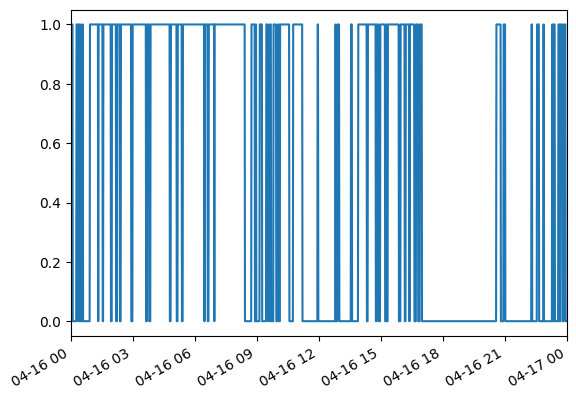

In [7]:
sleep(acti_a, datetime.date(2022,4,16), datetime.date(2022,4,17))